<a href="https://colab.research.google.com/github/kokejohh/PMU_Module_1/blob/main/PyTorch_Basecs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module4 Neural Network and Predictive Modeling**

# **PyTorch Basics**

PyTorch คือ open-source machine learning framework ที่พัฒนาโดย Facebook’s AI Research Lab (FAIR)
ออกแบบมาเพื่อให้นักวิจัยและนักพัฒนาใช้สร้าง neural network, deep learning model, และ machine learning algorithm ได้อย่างสะดวก

* Dynamic Computation Graph (Define-by-Run) กราฟจะถูกสร้างขึ้นในขณะรันโค้ด ทำให้ดีบักง่าย และยืดหยุ่นกว่าของ TensorFlow
*  โค้ดเขียนง่าย อ่านเข้าใจ syntax ได้ง่าย
* รองรับ GPU/CUDA (.to('cuda'))

---

# **หัวข้อสำหรับวันนี้** ☝ 👍 💯
# 1. Tensor
# 2.  Prepare Data
# 3. Define Model
# 4. Define Loss Function and Optimixer
# 5. Training Loop
# 6. Eevaluate and Predict
# 7. Save and Load Model
# 8. ฝึกเขียนโคด
📢

---



# **1. Tensor คืออะไร**
Tensor คือโครงสร้างข้อมูลหลักใน PyTorch (คล้ายกับ ndarray ของ NumPy)
ใช้เก็บข้อมูลตัวเลขในรูปของ array หลายมิติ (multi-dimensional array)

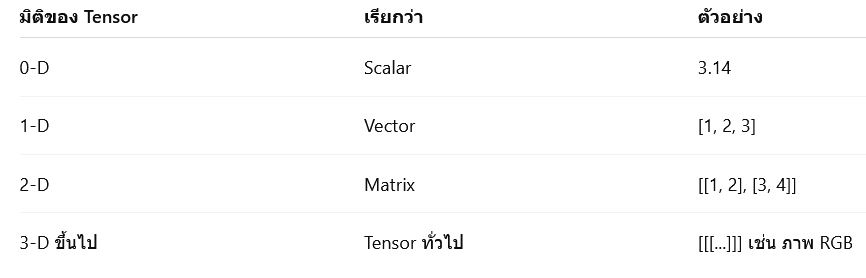

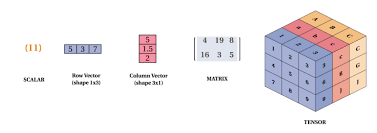

# **2. Prepare Data โดยใช้ PyTorch**
* ## สร้าง Dataset	โหลดหรือเตรียมข้อมูลดิบให้อยู่ในรูป tensor
* ## ใช้ Transform	แปลง/Normalize ข้อมูลให้อยู่ในรูปแบบที่เหมาะสม
* ## สร้าง DataLoader	รวมข้อมูลเป็น batch และ shuffle


In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader, TensorDataset

## แปลงข้อมูลจาก List ➡ Tensor

In [ ]:
data = [[1, 2], [3, 4]]
tensor_data = torch.tensor(data)

In [ ]:
print(tensor_data)
print("Shape:", tensor_data.shape)
print("Data type:", tensor_data.dtype)

tensor([[1, 2],
        [3, 4]])
Shape: torch.Size([2, 2])
Data type: torch.int64


## แปลงข้อมูลจาก NumPy array ➡ Tensor

In [ ]:
np_data = np.array([[5.0, 6.0], [7.0, 8.0]])
tensor_data = torch.from_numpy(np_data)

In [ ]:
print(tensor_data)
print("Shape:", tensor_data.shape)
print("Date type:", tensor_data.dtype)

tensor([[5., 6.],
        [7., 8.]], dtype=torch.float64)
Shape: torch.Size([2, 2])
Date type: torch.float64


In [ ]:
#ทดลองเขียนโปรแกรม

## สร้างข้อมูลตัวอย่างด้วย torch

In [ ]:
L_data = torch.linspace(0, 10, steps=100).unsqueeze(1)
L_label = 2 * L_data +1

print("Data:", L_data.shape, "Label:", L_label.shape)
print(L_data[:5])

Data: torch.Size([100, 1]) Label: torch.Size([100, 1])
tensor([[0.0000],
        [0.1010],
        [0.2020],
        [0.3030],
        [0.4040]])


In [ ]:
x_train, x_test = L_data[:80], L_data[80:]
y_train, y_test = L_label[:80], L_label[80:]

## ใช้ DataLoader สำหรับ batching & shuffle

In [ ]:
dataset = TensorDataset(x_train, y_train)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

print("ดึงข้อมูลจาก DataLoader")

for batch_x, batch_y in loader:
    print("Batch x shape:", batch_x.shape)
    print("Batch y shape:", batch_y.shape)
    break


ดึงข้อมูลจาก DataLoader
Batch x shape: torch.Size([8, 1])
Batch y shape: torch.Size([8, 1])


## ใช้กับข้อมูลภาพ MNIST
### ข้อมุลภาพ PyTorch ใช้ dataset ใน torchvision

## MNIST ตัวเลขเขียนด้วยมือ (0–9), grayscale ขนาด 28×28 pixels
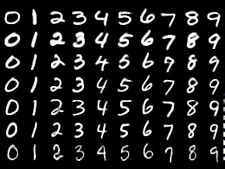

torchvision มี dataset ให้โหลดใช้งานได้โดยตรงหลายสิบชุด ทั้งแบบ image classification, object detection, segmentation, video, และ unsupervised / custom data

In [ ]:
from torchvision import datasets, transforms

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='data', train=True, download= True,  transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 491kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.55MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.4MB/s]


In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

images, labels  = next(iter(train_loader))
print("Image shape:", images.shape)
print("Labels shape:", labels.shape)

Image shape: torch.Size([32, 1, 28, 28])
Labels shape: torch.Size([32])


# **3. Define Model**

การสร้างโมเดลใน PyTorch จะทำโดยการสืบทอดจากคลาส
torch.nn.Module
ซึ่งเป็น base class ของทุก neural network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

## สร้าง Linear Neural Network

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self) :
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
LNN = NeuralNet()
print(LNN)

NeuralNet(
  (fc1): Linear(in_features=1, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)


## สร้าง Convolutional Neural Network CNN ใช้สำหรับรูปภาพ

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Convolutional Layers
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        # Fully Connected layers
        self.fc1 = nn.Linear(32*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7) # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
CNN = CNNModel()
print(CNN)

CNNModel(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


# **4. Define Loss Function and Optimixer**

## Loss Function (ฟังก์ชันความสูญเสีย)

> ### คือตัววัดความผิดพลาดระหว่างคำตอบที่โมเดลทำนาย (y_pred) และ คำตอบจริง (y_true)

โมเดลจะพยายาม ลดค่า loss ให้ต่ำที่สุด
ด้วยการปรับพารามิเตอร์ภายใน (weights, bias)

## Optimizer (ตัวปรับพารามิเตอร์)

###ทำหน้าที่ อัปเดตค่า weights ของโมเดลตามทิศทางที่ลดค่า loss ได้มากที่สุด เช่น

* SGD (Stochastic Gradient Descent)

* Adam (Adaptive Moment Estimation)

In [ ]:
import torch.optim as optim

In [ ]:
criterionLNN = nn.MSELoss() # สร้าง Loss Funcion
optimizerLNN = optim.Adam(LNN.parameters(), lr=0.01)
# model.parameter ดึงพารามีเตอร์ทั้งหมดในโมเดล เพื่อให้ optimizer สามารถเข้าถึงได้
print(LNN)
print("LNN loss function:", criterionLNN)
print("LNN Optimizer:", optimizerLNN)

NeuralNet(
  (fc1): Linear(in_features=1, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)
LNN loss function: MSELoss()
LNN Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


In [ ]:
criterionCNN = nn.CrossEntropyLoss() #รวม softmax ภายในด้วยแล้ว
optimizerCNN = optim.Adam(CNN.parameters(), lr=0.001)
print(CNN)
print("CNN Loss function:", criterionCNN)
print("CNN Optimizer:", optimizerCNN)

CNNModel(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
CNN Loss function: CrossEntropyLoss()
CNN Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


# **5. Training Loop**
> PyTorch จะมีการควบคุมขั้นตอนการเทรนเองแบบยืดหยุ่นมากๆ

### ในแต่ละ epoch

1. model.train() ➡ บอก PyTorch ว่าอยู่ในโหมดเทรน (เปิด dropout, batchnorm)
2. Loop ผ่าน DataLoader  ➡ ดึงข้อมูล batch ทีละชุด
3. Forward pass ➡ ส่ง input → model → คำนวณ output
4. Compute loss ➡ วัดความผิดพลาดในการทำนาย
5. Zero gradients ➡เคลียร์ค่า gradient เดิมจากรอบก่อน
6. Backward pass ➡ คำนวณ gradient (loss.backward())
7. Update weights ➡ ใช้ optimizer ปรับพารามิเตอร์ (optimizer.step())



---


### **Training Loop สำหรับ linear Neural Network**

In [ ]:
# ---- Training Loop -----
epochs = 200
for epoch in range(epochs):
    LNN.train()                                        # set train model
    optimizerLNN.zero_grad()                    # clear gradients
    y_pred = LNN(x_train)                        # forward
    loss = criterionLNN(y_pred, y_train)     # compute loss
    loss.backward()                                 # backward
    optimizerLNN.step()                            # update weights

    if (epoch+1) % 20 == 0:
        print(f"Epoch>> [{epoch+1}/{epochs}] >> Loss: {loss.item():.4f}")

Epoch>> [20/200] >> Loss: 3.7325
Epoch>> [40/200] >> Loss: 0.4002
Epoch>> [60/200] >> Loss: 0.2730
Epoch>> [80/200] >> Loss: 0.0951
Epoch>> [100/200] >> Loss: 0.0018
Epoch>> [120/200] >> Loss: 0.0014
Epoch>> [140/200] >> Loss: 0.0010
Epoch>> [160/200] >> Loss: 0.0010
Epoch>> [180/200] >> Loss: 0.0009
Epoch>> [200/200] >> Loss: 0.0009


### **Training Loop สำหรับ CNN**

In [ ]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    CNN.train()

    for images, labels in train_loader:
        optimizerCNN.zero_grad()
        outputs = CNN(images)
        loss = criterionCNN(outputs, labels)
        loss.backward()
        optimizerCNN.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch>> [{epoch+1}/{epochs}] Loss: {running_loss/len(train_loader):.4f} Accuracy: {accuracy:.2f}%")


Epoch>> [1/5] Loss: 0.1499 Accuracy: 95.47%
Epoch>> [2/5] Loss: 0.0477 Accuracy: 98.52%
Epoch>> [3/5] Loss: 0.0329 Accuracy: 98.99%
Epoch>> [4/5] Loss: 0.0235 Accuracy: 99.25%
Epoch>> [5/5] Loss: 0.0186 Accuracy: 99.36%


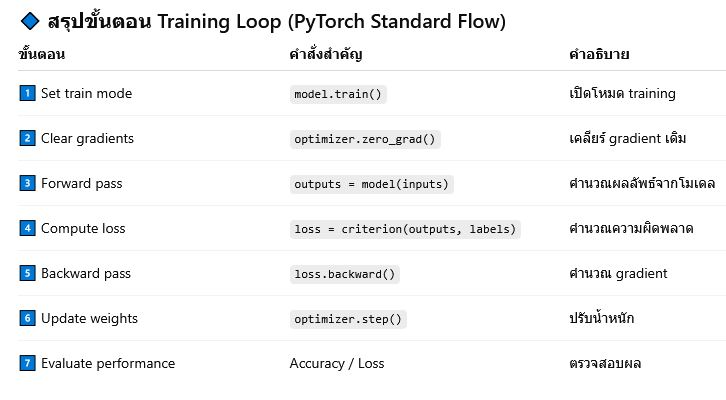

# **6. Eevaluate and Predict**
> ### Model ที่เราได้ทำการฝึกสอนแล้ว จำนำไปทำนายข้อมูลใหม่เป็นข้อมูลที่ Model ของเราไม่เคยเห็นมาก่อนแล้วทำการประเมินประสิทธิภาพของโมเดล

---

## Evaluate LNN

In [ ]:
LNN.eval()
with torch.no_grad():
    y_test_pred = LNN(x_test)
    test_loss = criterionLNN(y_test_pred, y_test)

print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.0035


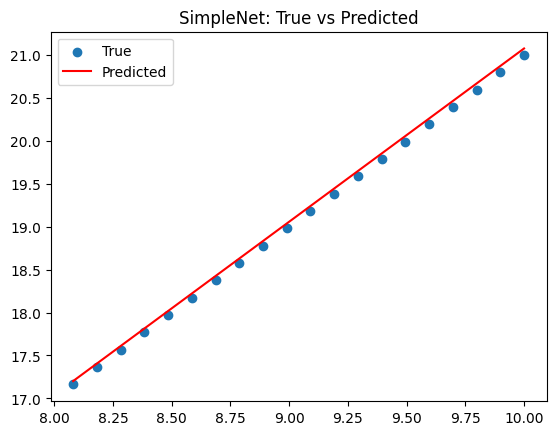

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test, label='True')
plt.plot(x_test, y_test_pred, color='red', label='Predicted')
plt.legend()
plt.title("SimpleNet: True vs Predicted")
plt.show()

# ทดลอง Predict ข้อมูลใหม่ด้วย LNN (y=2x+1 : 25)

In [ ]:
x_new = torch.tensor([[12.0]])
y_new_pred = LNN(x_new)
print(f"Prediction for x=12: {y_new_pred.item():.2f}")

Prediction for x=12: 25.12


## Evaluate and Predict สำหรับ CNN โดย MNIST Classification

In [ ]:
CNN.eval()
test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = CNN(images)
        loss = criterionCNN(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

avg_loss = test_loss / len(test_loader)
accuracy = 100 * correct / total
print(f"Test Loss: {avg_loss:.4f} Accuracy: {accuracy:.2f}%")


Test Loss: 0.0328 Accuracy: 98.95%


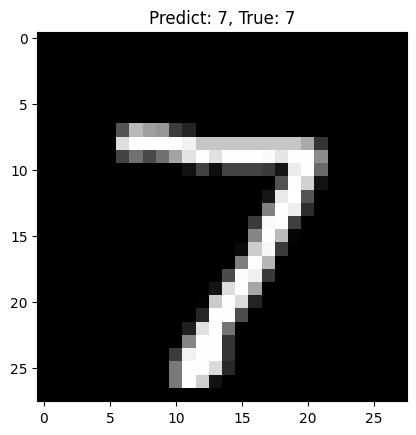

In [ ]:
CNN.eval()
with torch.no_grad():
    sample_image, sample_label = next(iter(test_loader))
    output = CNN(sample_image[0].unsqueeze(0))
    pred = torch.argmax(output)

plt.imshow(sample_image[0].squeeze(), cmap='gray')
plt.title(f"Predict: {pred}, True: {sample_label[0]}")
plt.show()

## **7. Save and Load Model**
saveและ load โมเดลที่เทรนสำเร็จด้วย PyTorch
* เก็บโมเดลไว้ใช้ในอนาคต
* นำไปทำนายในเครื่องอื่น
* หรือใช้ต่อยอด (fine-tuning) ได้


In [ ]:
torch.save(LNN.state_dict(), "mlp.pt")

In [ ]:
LNN.load_state_dict(torch.load("mlp.pt"))
print("Model loaded successfully!")

Model loaded successfully!


**Save only model weights** (แนะนำ)
บันทึกเฉพาะพารามิเตอร์ของโมเดล (state_dict) ใช้คำสั่ง ▶
torch.save(model.state_dict(), path)

**โหลดเฉพาะ weights** ใช้คำสั่ง ▶ model.load_state_dict(torch.load(path))

---

**Save entire model object**
บันทึกทั้งโครงสร้าง + weights (*ไม่แนะนำ เพราะ version อาจไม่ตรงกัน*) ใช้คำสั่ง ▶
torch.save(model, path)

**หลดทั้งโมเดล** ใช้คำสั่ง ▶
model = torch.load(path)


# **Yea, it's done.** ✨✨✨✨✨

# **8. เขียนโคด PyTorch สำหรับงานจำแนกประเภทชุดข้อมูล FashionMNIST**
# โหลดข้อมูล✅ → สร้างโมเดล✅ → เทรน✅ → ประเมินผล✅ → บันทึก/โหลดโมเดล ✅

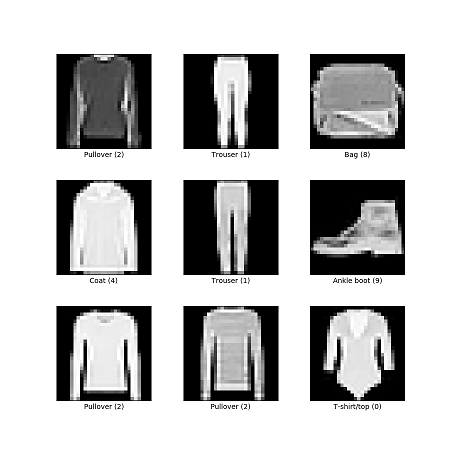

Fashion-MNIST เป็นชุดข้อมูลของรูปภาพบทความของ Zalando ที่ประกอบด้วยชุดการฝึกอบรมที่มีตัวอย่าง 60,000 รายการ และชุดทดสอบที่มีตัวอย่าง 10,000 รายการ แต่ละตัวอย่างเป็นรูปภาพระดับสีเทาขนาด 28x28 ซึ่งเชื่อมโยงกับป้ายกำกับจาก 10 คลาส
# ------------------------------------------------------------------
# **FashionMNIST Classification using Neural Network (MLP)**
# ------------------------------------------------------------------

In [ ]:
from logging import root
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# --------------------------
# 1. Prepare Dataset
# --------------------------
# แปลงเป็น Tensor
# Normalize ให้อยู่ในช่วง [-1, 1]
# สร้างข้อมูล train test
# Insert code here


# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"This code using device: {device}")

# --------------------------
# 2. Define Model (MLP)
# --------------------------
# 10 classes
class FashionMLP():
    def __init__(self):
        super(FashionMLP, self).__init__()

        self.layers = nn.Sequential(
            #insert code here

        )

    def forward(self, x):
        #Insert code here

        return x

model = FashionMLP()
model.to(device)
print(model)

# --------------------------
# 3. Define Loss & Optimizer
# --------------------------
# Insert code here



# --------------------------
# 4. Training Loop
# --------------------------
epochs = 2
for epoch in range(epochs):

    running_loss = 0.0
    correct = 0
    total = 0


    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        #Insert code here


    acc =
    print(f"Epoch [{epoch+1}/{epochs}]  Loss: {running_loss/len(train_data):.4f}  Accuracy: {acc:.2f}%")

# --------------------------
# 5. Save & Load Model
# --------------------------
# Save model
# Insert code here

print("Model saved as 'fashion_mlp.pth'")

# Load model
loaded_model = FashionMLP().to(device)
loaded_model.load_state_dict(torch.load("fashion_mlp.pth"))


loaded_model.eval()
loaded_model.to(device)
print("Model loaded successfully!")

# --------------------------
# 6. Evaluation : Test set
# --------------------------
# Insert code here
all_preds = []
all_labels = []
loaded_model.eval()



SyntaxError: invalid syntax (ipython-input-1690532009.py, line 71)

[np.int64(9), np.int64(2), np.int64(1), np.int64(1), np.int64(6), np.int64(1), np.int64(4), np.int64(6), np.int64(5), np.int64(7), np.int64(4), np.int64(5), np.int64(7), np.int64(3), np.int64(4), np.int64(1), np.int64(2), np.int64(4), np.int64(8), np.int64(0), np.int64(2), np.int64(5), np.int64(7), np.int64(9), np.int64(1), np.int64(4), np.int64(6), np.int64(0), np.int64(9), np.int64(3), np.int64(8), np.int64(8), np.int64(3), np.int64(3), np.int64(8), np.int64(0), np.int64(7), np.int64(5), np.int64(7), np.int64(9), np.int64(6), np.int64(1), np.int64(3), np.int64(7), np.int64(6), np.int64(7), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(4), np.int64(4), np.int64(5), np.int64(8), np.int64(2), np.int64(2), np.int64(8), np.int64(4), np.int64(8), np.int64(0), np.int64(7), np.int64(7), np.int64(8), np.int64(5), np.int64(1), np.int64(1), np.int64(2), np.int64(3), np.int64(9), np.int64(8), np.int64(7), np.int64(0), np.int64(2), np.int64(6), np.int64(2), np.int64(3), np.int64(1)

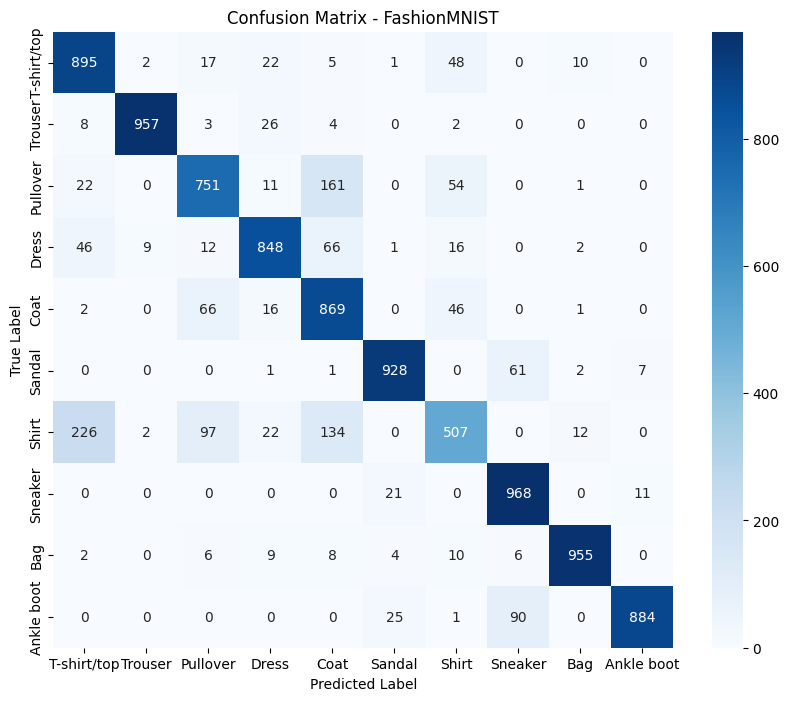


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.75      0.90      0.81      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.79      0.75      0.77      1000
       Dress       0.89      0.85      0.87      1000
        Coat       0.70      0.87      0.77      1000
      Sandal       0.95      0.93      0.94      1000
       Shirt       0.74      0.51      0.60      1000
     Sneaker       0.86      0.97      0.91      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.98      0.88      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



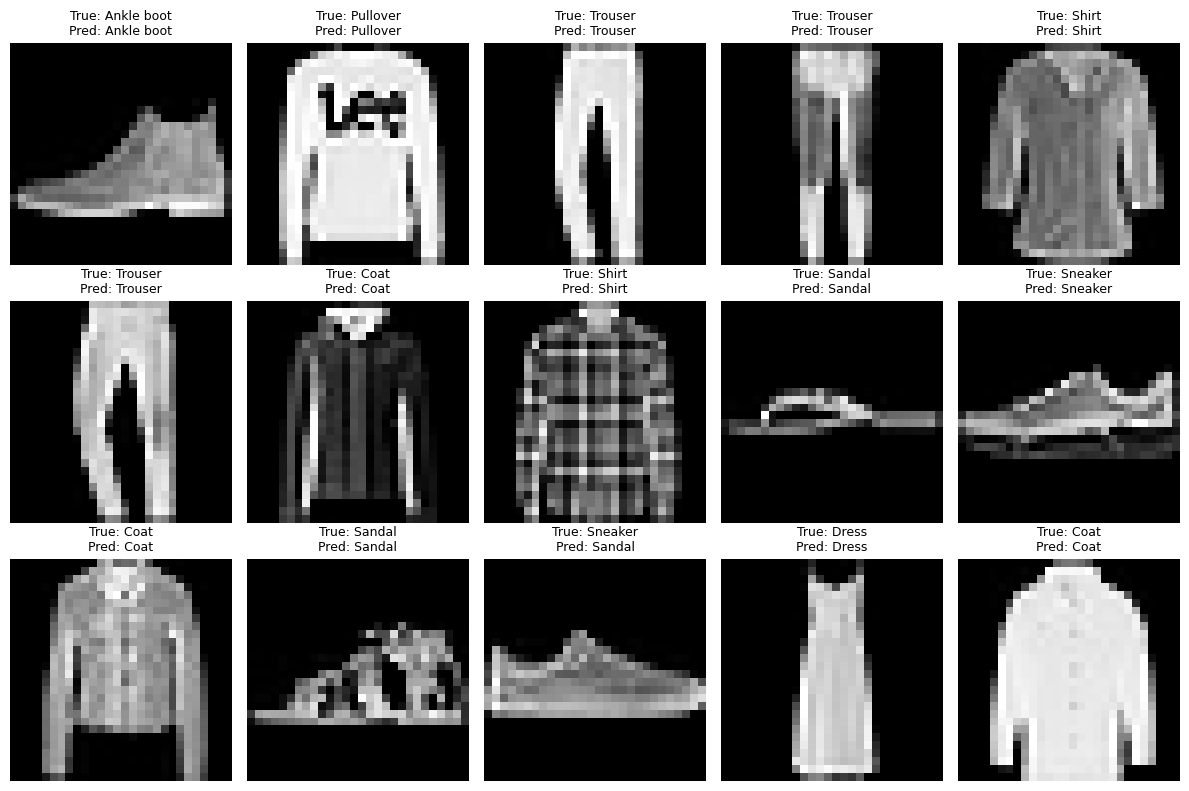

In [ ]:
print(all_labels)
print(all_preds)
# --------------------------
# 7. Confusion Matrix
# --------------------------
cm = confusion_matrix(all_labels, all_preds)
classes = train_data.classes  # ['T-shirt/top', 'Trouser', 'Pullover', ...]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - FashionMNIST")
plt.show()

# --------------------------
# 8. Classification Report
# --------------------------
print("\nClassification Report:")

print(classification_report(all_labels, all_preds, target_names=classes))

# --------------------------
# 9. Visualization of Predictions
# --------------------------
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
axes = axes.flatten()

for i in range(15):
    img, label = test_data[i]
    with torch.no_grad():
        output = loaded_model(img.unsqueeze(0).to(device))
        pred = torch.argmax(output, 1).item()
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(f"True: {classes[label]}\nPred: {classes[pred]}", fontsize=9)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# **จบแล้ว สำหรับ PyTorch Basecs**